The first line is white ball, followed by 9 Red balls
[[ 27  46]
 [133  62]
 [114  81]
 [193  68]
 [ 62  85]
 [163  44]
 [132  90]
 [100  93]
 [190  38]]
############################################################
THE POCKETS ARE COUNTED FROM 0-5 IN CLOCKWISE FROM THE ORIGIN
############################################################


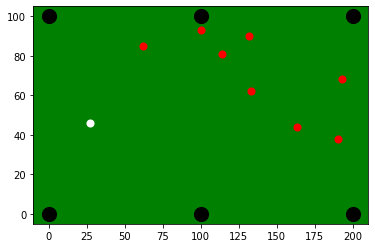

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

#generate random ball positions
balls = np.zeros((9,2),dtype=np.int)
#i=0
for i in range(0,9): 
    for j in range(0,2): 
        balls[i,j] = np.random.randint(0,200)
    balls[i,j] = np.random.randint(0,100)
pockets = np.array([[0,0],[0,100],[100,100],[200,100],[200,0],[100,0]])
print("The first line is white ball, followed by " + str(len(balls))+ " Red balls")
print(balls)


#functions to map 2 ranges and to get angle between 3 points

def map(value, leftMin, leftMax, rightMin, rightMax):      
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin
    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)
    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

def getAngle(a, b, c):                                     
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    #return (ang) if ang < 0 else abs(ang)
    #return abs(ang) if ang < 0 and not abs(ang)>90 else abs(180-ang)
    
    #conditions to output proper angles, can still be imporved as it gives a wrong output in certain cases
    
    if ang<0 and (180+ang)>0:
        return 180+ang
    elif ang>0 and 180-ang<0:
        return ang-180
    elif ang<0 and 180+ang<0:
        return 90
    elif ang>0 and 180-ang>0:
        return 90
    else:
        return 90



#snooker table plot
ax = plt.axes()
ax.set_facecolor("green")
plt.scatter(balls[1:,0],balls[1:,1], color = 'red',s=50)
plt.scatter(balls[0,0],balls[0,1],color = 'white',s=50)
plt.scatter(pockets[:,0],pockets[:,1],color = 'black',s=200)
print("############################################################")
print("THE POCKETS ARE COUNTED FROM 0-5 IN CLOCKWISE FROM THE ORIGIN")
print("############################################################")
plt.show()

In [2]:
#ARRAY INIT
prob1 = np.zeros((len(balls) - 1,6))
nearest = np.zeros((len(balls) - 1))
drp = np.zeros((len(balls) - 1,6))
dwrp = np.zeros((len(balls) - 1,6))
angles = np.zeros((len(balls) - 1,6))
prob2 = np.zeros((len(balls) - 1,6))


for i in range(1,len(balls)):
    for j in range(0,6):
        drp[i-1,j] = int(np.linalg.norm(balls[i] - pockets[j]))  #DISTANCE FROM RED TO POCKET
        dwrp[i-1,j] = int(np.linalg.norm(balls[0] - balls[i])) + drp[i-1,j]   #DISTANCE FROM WHITE TO RED TO POCKET
        prob1[i-1,j] = map(dwrp[i-1,j],0,250,1,0)
    nearest[i-1] = np.argmin(drp[i-1]) #NEAREST POCKET FOR THE BALL, (not used in further calculations, 
                                                                     #but is a good variable to take a different logic route)

#print(dwrp)        
#print(prob1)
#print(nearest)

for i in range(0,len(balls)-1):
    for j in range(0,6):
        angles[i,j] = getAngle(balls[0],balls[i+1],pockets[j])
        if angles[i,j]>90:
            angles[i,j]=90
        prob2[i,j] = map(angles[i,j],0,90,1,0.01)
        
#print(angles)
#print(prob2)    

In [3]:
#FINAL PROBABILITY BEING PRODUCT OF ANGLE AND DISTACNCE PROBS
final  = prob1 * prob2
for i in range(0,len(balls) - 1):
    print("The ball number " + str(i+1)+ " at "+ str(balls[i+1])+" has "+ 
          "{:.2f}".format(max(final[i])*100) + "% chance to pocket at " + str(np.argmax(final[i])))

print("####################################################################")
print("Final Prob matrix")
print("Each row corresponds to a ball and each column gives the mapped probability the ball may be pocketed in the respective pocket")
print(final)

The ball number 1 at [133  62] has 20.31% chance to pocket at 3
The ball number 2 at [114  81] has 0.54% chance to pocket at 2
The ball number 3 at [193  68] has 4.67% chance to pocket at 3
The ball number 4 at [62 85] has 0.63% chance to pocket at 2
The ball number 5 at [163  44] has 6.93% chance to pocket at 3
The ball number 6 at [132  90] has 0.42% chance to pocket at 2
The ball number 7 at [100  93] has 23.27% chance to pocket at 2
The ball number 8 at [190  38] has 0.80% chance to pocket at 3
####################################################################
Final Prob matrix
Each row corresponds to a ball and each column gives the mapped probability the ball may be pocketed in the respective pocket
[[-1.20000000e-04  2.00000000e-04  3.72000000e-03  2.03083567e-01
   2.08000000e-03  2.92000000e-03]
 [ 7.20000000e-04  1.68000000e-03  5.36000000e-03  2.76000000e-03
   1.56000000e-03  3.00000000e-03]
 [-4.84000000e-03 -4.48000000e-03 -6.00000000e-04  4.66698143e-02
   6.00000000e-

In [15]:
 np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
